# Task 1
There's an app for editing photos in Stories format (like in Instagram). There was an A/B-test with two groups: a test group had a new payment system for template collections, a control group had an old one. Your task is to analyze the experimnent's result and decide if the new system should be used for all users. There are three datasets available:
* `active_users` - data on users who used the app during the experiment
* `groups` - user division into test and control groups
* `purchases` - data on app transactions during the experiment

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# loading datasets, checking for null values
active_groups = pd.read_csv('https://stepik.org/media/attachments/lesson/426730/active_users.csv')
groups = pd.read_csv('https://stepik.org/media/attachments/lesson/426730/groups.csv')
purchases = pd.read_csv('https://stepik.org/media/attachments/lesson/426730/purchases.csv')

In [3]:
active_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   8341 non-null   int64 
 1   country   8341 non-null   object
 2   platform  8341 non-null   object
 3   sex       8341 non-null   object
dtypes: int64(1), object(3)
memory usage: 260.8+ KB


In [4]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74576 entries, 0 to 74575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  74576 non-null  int64 
 1   group    74576 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [5]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  541 non-null    int64  
 1   revenue  541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


In [6]:
active_groups.isna().sum()

user_id     0
country     0
platform    0
sex         0
dtype: int64

In [7]:
groups.isna().sum()

user_id    0
group      0
dtype: int64

In [8]:
purchases.isna().sum()

user_id    0
revenue    0
dtype: int64

In [9]:
# adding extra columns for paying and active users, renaming groups for readability
purchases['pay'] = 'pay'
active_groups['activity'] = 'active'
groups['group'] = groups['group'].map({'A':'control', 'B':'test'})

In [10]:
# merging datasets
all_data = groups.merge(active_groups, how='left', on=['user_id']).merge(purchases, how='left', on=['user_id'])

In [11]:
all_data

,user_id,group,country,platform,sex,activity,revenue,pay
0,9149,test,NaN,NaN,NaN,NaN,NaN,NaN
1,9150,test,NaN,NaN,NaN,NaN,NaN,NaN
2,9151,control,NaN,NaN,NaN,NaN,NaN,NaN
3,9152,test,NaN,NaN,NaN,NaN,NaN,NaN
4,9153,test,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
74571,1010,test,Sweden,android,male,active,NaN,NaN
74572,7785,control,Sweden,android,male,active,NaN,NaN
74573,1783,test,Russia,ios,female,active,NaN,NaN
74574,1164,control,Sweden,android,male,active,NaN,NaN


In [12]:
# filling null values
all_data['activity'] = all_data['activity'].fillna('nonactive')
all_data['revenue'] = all_data['revenue'].fillna(0)
all_data['pay'] = all_data['pay'].fillna('nopay')

In [13]:
all_data

,user_id,group,country,platform,sex,activity,revenue,pay
0,9149,test,NaN,NaN,NaN,nonactive,0.0,nopay
1,9150,test,NaN,NaN,NaN,nonactive,0.0,nopay
2,9151,control,NaN,NaN,NaN,nonactive,0.0,nopay
3,9152,test,NaN,NaN,NaN,nonactive,0.0,nopay
4,9153,test,NaN,NaN,NaN,nonactive,0.0,nopay
...,...,...,...,...,...,...,...,...
74571,1010,test,Sweden,android,male,active,0.0,nopay
74572,7785,control,Sweden,android,male,active,0.0,nopay
74573,1783,test,Russia,ios,female,active,0.0,nopay
74574,1164,control,Sweden,android,male,active,0.0,nopay


In [14]:
# active vs nonactive users
all_data.groupby(['group', 'activity']).user_id.count()

group    activity 
control  active        1538
         nonactive    13155
test     active        6803
         nonactive    53080
Name: user_id, dtype: int64

In [15]:
# paying vs nonpaying users
all_data.groupby(['group', 'pay']).user_id.count()

group    pay  
control  nopay    14586
         pay        107
test     nopay    59449
         pay        434
Name: user_id, dtype: int64

In [16]:
all_data.groupby(['group', 'activity','pay']).user_id.count()

group    activity   pay  
control  active     nopay     1460
                    pay         78
         nonactive  nopay    13126
                    pay         29
test     active     nopay     6489
                    pay        314
         nonactive  nopay    52960
                    pay        120
Name: user_id, dtype: int64

In [17]:
all_data.query('activity == "nonactive" and pay == "pay"').groupby('group').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
control,29.0,674.62069,371.774933,209.0,302.0,700.0,701.0,1990.0
test,120.0,728.85000,381.141290,207.0,381.5,700.0,999.0,1911.0


In [18]:
all_data.query('activity == "active" and pay == "pay"').groupby('group').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
control,78.0,943.564103,919.910874,208.0,300.0,596.0,1125.25,3671.0
test,314.0,1267.875796,790.857880,207.0,520.5,1151.0,1910.00,4660.0


Text(0.5, 1.0, 'Revenue distribution of active users')

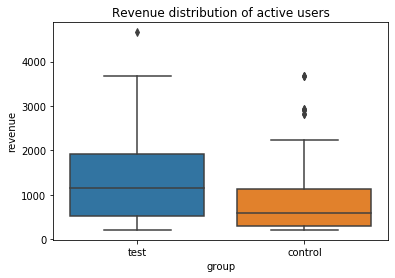

In [19]:
sns.boxplot(x='group', y='revenue', data=all_data.query('activity == "active" and pay == "pay"'))
plt.title('Revenue distribution of active users')

NormaltestResult(statistic=34632.473713855405, pvalue=0.0)


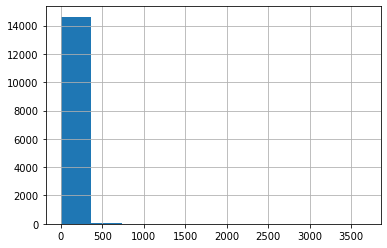

In [20]:
# using normality test
all_data[all_data.group == 'control'].revenue.hist()
print(stats.normaltest(all_data[all_data.group == 'control'].revenue))

NormaltestResult(statistic=121119.93027651821, pvalue=0.0)


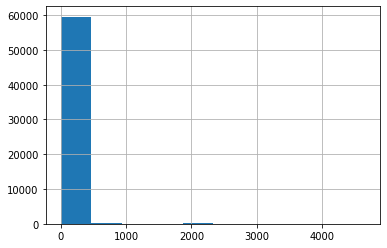

In [21]:
all_data[all_data.group == 'test'].revenue.hist()
print(stats.normaltest(all_data[all_data.group == 'test'].revenue))

Revenues are not normally distributed, so we should use nonparametric tests for further analysis.  
Let's take a look at these KPIs: ARPU, ARPPU, converstion rate.

In [22]:
# analyzing ARPU
arpu_control = all_data[all_data.group == 'control'].revenue.mean()
arpu_test = all_data[all_data.group == 'test'].revenue.mean()
print(f'ARPU Control: {arpu_control:.2f}')
print(f'ARPU Test: {arpu_test:.2f}')

ARPU Control: 6.34
ARPU Test: 8.11


In [23]:
stats.mannwhitneyu(all_data[all_data.group == 'control'].revenue, all_data[all_data.group == 'test'].revenue)

MannwhitneyuResult(statistic=439920619.5, pvalue=0.4885811493494128)

p > 0.05, thus we can't reject the zero hypothesis on absence of significant difference between groups.

In [24]:
control_pay = all_data.query('group == "control" and pay == "pay"')
control_pay.shape[0]

107

In [25]:
test_pay = all_data.query('group == "test" and pay == "pay"')
test_pay.shape[0]

434

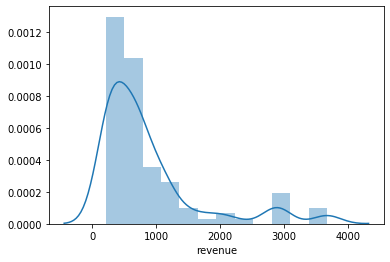

In [26]:
ax = sns.distplot(control_pay.revenue)

In [27]:
print(np.percentile(control_pay.revenue, [90, 95, 99]))

[1990.   2906.7  3669.94]


Most users in the control group make transactions not greater than 1000

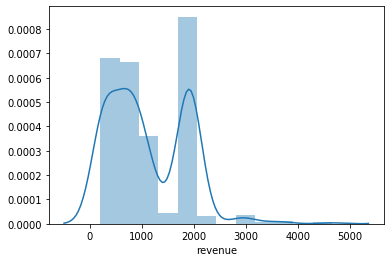

In [28]:
ax = sns.distplot(test_pay.revenue)

In [29]:
print(np.percentile(test_pay.revenue, [90, 95, 99]))

[1911.   1912.   3007.43]


Most users in the test group make transactions about 1900-2000. This shift could be because of new payment system.

In [30]:
stats.shapiro(control_pay.revenue)

(0.7201215028762817, 5.480257090142993e-13)

In [31]:
stats.shapiro(test_pay.revenue)

(0.8677289485931396, 9.681641387832235e-19)

In [32]:
# analyzing ARPPU
arppu_control = control_pay.revenue.mean()
arppu_test = test_pay.revenue.mean()
print(f'ARPPU Control: {arppu_control:.2f}')
print(f'ARPPU Test: {arppu_test:.2f}')
print(f'ARPPU difference: {(arppu_test-arppu_control)/arppu_control:.2%}')

ARPPU Control: 870.67
ARPPU Test: 1118.84
ARPPU difference: 28.50%


In [33]:
stats.mannwhitneyu(control_pay.revenue, test_pay.revenue)

MannwhitneyuResult(statistic=17699.5, pvalue=6.82355138697427e-05)

p < 0.05, so we can reject the zero hypothesis on absence of significant difference between groups.

In [34]:
# analyzing conversion rate
conversion_control = control_pay.shape[0] / all_data[all_data.group=='control'].shape[0]
conversion_test = test_pay.shape[0] / all_data[all_data.group=='test'].shape[0]
print(f'Conversion Control: {conversion_control:.2%}')
print(f'Conversion Test: {conversion_test:.2%}')
print(f'Conversion difference: {(conversion_test-conversion_control)/conversion_control:.2%}')

Conversion Control: 0.73%
Conversion Test: 0.72%
Conversion difference: -0.48%


In [35]:
# looking at demographics distribution
control_pay.sex.value_counts(normalize=True).mul(100)

male      52.564103
female    47.435897
Name: sex, dtype: float64

In [36]:
test_pay.sex.value_counts(normalize=True).mul(100)

male      50.955414
female    49.044586
Name: sex, dtype: float64

In [37]:
control_pay.platform.value_counts(normalize=True).mul(100)

ios        50.0
android    50.0
Name: platform, dtype: float64

In [38]:
test_pay.platform.value_counts(normalize=True).mul(100)

android    53.821656
ios        46.178344
Name: platform, dtype: float64

In [39]:
control_pay.country.value_counts(normalize=True).mul(100)

Russia    55.128205
Sweden    44.871795
Name: country, dtype: float64

In [40]:
test_pay.country.value_counts(normalize=True).mul(100)

Russia    62.738854
Sweden    37.261146
Name: country, dtype: float64

Text(0.5, 1.0, 'Revenue distribution by sex')

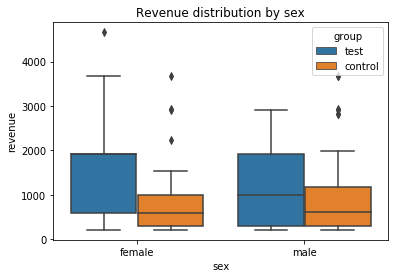

In [41]:
sns.boxplot(x = 'sex', y = 'revenue', data = all_data[all_data.revenue>0].query('activity == "active"'), hue='group')
plt.title('Revenue distribution by sex')

Text(0.5, 1.0, 'Revenue distribution by country')

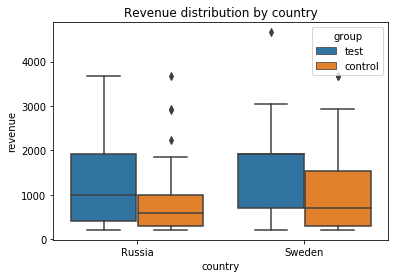

In [42]:
sns.boxplot(x = 'country', y = 'revenue', data = all_data[all_data.revenue>0].query('activity == "active"'), hue='group')
plt.title('Revenue distribution by country')

Text(0.5, 1.0, 'Revenue distribution by platform')

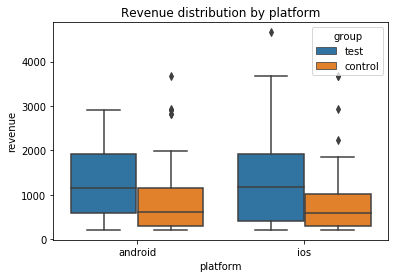

In [43]:
sns.boxplot(x='platform', y='revenue', data=all_data[all_data.revenue>0].query('activity == "active"'), hue='group')
plt.title('Revenue distribution by platform')

## Results
Statistical tests show only one significant difference: test group **ARPPU** is by **28.5%** higher than of the control group. This seems like a successful result and the new payment system could be used for all users. Although this analysis may be not enough for such decision, then an additional analysis for more detailed data on the experiment should be performed. 